In [1]:
from joblib import Parallel, delayed
import joblib, pandas as pd
import numpy as np, gc
from SK import *

In [6]:
# COU = pd.read_pickle("data/COUPANG.pickle")
COU = pd.read_pickle("data/GSS_STOCK.pk")

COU_LIST =np.random.permutation(COU.ITEM_ID.unique())
n = COU.ITEM_ID.nunique()
cs = n // 100
chunk = (n // cs) + 1
COU_dict = {i:COU[COU.ITEM_ID.isin(COU_LIST[cs*i:cs*(i+1)])] for i in range(chunk)}

In [7]:
print(COU.shape);COU.head(1)

(765853, 5)


,ITEM_ID,STOCK_ID,STOCK_AMOUNT,COLLECT_DAY,REG_DT
0,1806022,13062930,986,20180601,2018-06-01 05:40:11


In [8]:
%%time
gc.collect()
par_res = Parallel(n_jobs=-1)(joblib.delayed(apply_model)(value) for key,value in COU_dict.items()) #COU_dict.get(key)=value
res = pd.concat([par_res[i] for i in range(len(par_res))])
res.to_pickle('data/res_gsshop.pic')

Wall time: 8min 6s


In [17]:
res[res.duplicated('STOCK_ID')].shape
# COU.duplicated('STOCK_ID')

(744116, 9)

In [29]:
res[res['ITEM_ID']==1044720].shape#[['STOCK_ID','SELL_AMMOUNT','COLLECT_DAY']]
## GROUPBY ROW COUNT = SELL_AMOUNT 가 0인 ROW의 COUNT

GSS_SELL=res.groupby("ITEM_ID").SELL_AMOUNT.sum().reset_index()
print(GSS_SELL.shape)
GSS_SELL[GSS_SELL.SELL_AMOUNT>0].shape
# OLI_FINAL = OLI_SELL.merge(OLI_ITEM, on="ITEM_ID").merge(MLF, on="ITEM_NUM")
# OLI_FINAL["SELL"] = OLI_FINAL.SELL_AMOUNT * OLI_FINAL.NORMAL_PRICE_SITE

(10346, 2)


(3731, 2)

In [76]:
GSS_SELL[GSS_SELL.SELL_AMOUNT>10].head(10)

,ITEM_ID,SELL_AMOUNT
71,845160,85.0
72,846364,46.0
92,1806329,37.0
93,1806500,19.0
94,1806690,14.0
98,1807560,41.0
100,1807901,53.0
103,1808110,32.0
107,1808581,14.0
115,1809164,16.0


In [41]:
pos_res = res[res.ITEM_ID.isin(GSS_SELL[GSS_SELL.SELL_AMOUNT>0].ITEM_ID)]
pos_res.head(1)

,SELL_AMOUNT,STOCK_AMOUNT,REVISE_STOCK_AMOUNT,STOCK_ID,ITEM_ID,UPT_DT,COLLECT_DAY,UPT_ID,REG_DT
30,0,10188,10188,13062930,2726884,2018-07-11 11:00:50,2018-06-01,FILTER ALGO,2018-06-01


In [70]:
pos_res[(pos_res.STOCK_ID=='13062930')&(pos_res.ITEM_ID==2726884)].sort_values(by=['COLLECT_DAY'])[0:1]

,SELL_AMOUNT,STOCK_AMOUNT,REVISE_STOCK_AMOUNT,STOCK_ID,ITEM_ID,UPT_DT,COLLECT_DAY,UPT_ID,REG_DT
30,0,10188,10188,13062930,2726884,2018-07-11 11:00:50,2018-06-01,FILTER ALGO,2018-06-01


In [71]:
pos_res[(pos_res.STOCK_ID=='13062930')&(pos_res.ITEM_ID==2726884)].sort_values(by=['COLLECT_DAY']).COLLECT_DAY[0:10]
# pos_res[pos_res.STOCK_ID=='13062930'].sort_values(by=['COLLECT_DAY']).SELL_AMOUNT[0:2]

30   2018-06-01
31   2018-06-02
32   2018-06-03
33   2018-06-04
34   2018-06-05
35   2018-06-06
36   2018-06-07
37   2018-06-08
38   2018-06-09
39   2018-06-10
Name: COLLECT_DAY, dtype: datetime64[ns]

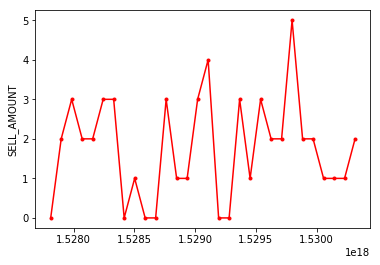

In [79]:
import matplotlib.pyplot as plt
plt.plot(
    
    pos_res[(pos_res.STOCK_ID=='13062930')&(pos_res.ITEM_ID==1807901)].sort_values(by=['COLLECT_DAY']).COLLECT_DAY,
    pos_res[(pos_res.STOCK_ID=='13062930')&(pos_res.ITEM_ID==1807901)].sort_values(by=['COLLECT_DAY']).SELL_AMOUNT,
#     pos_res[(pos_res.STOCK_ID=='13062930')&(pos_res.ITEM_ID==2726884)].sort_values(by=['COLLECT_DAY']).COLLECT_DAY,
#     pos_res[(pos_res.STOCK_ID=='13062930')&(pos_res.ITEM_ID==2726884)].sort_values(by=['COLLECT_DAY']).SELL_AMOUNT,
    'r.-')
plt.ylabel('SELL_AMOUNT')
plt.figure(figsize=(20,20))
plt.show()

In [80]:
pos_res[(pos_res.STOCK_ID=='13062930')&(pos_res.ITEM_ID==1807901)&(pos_res.SELL_AMOUNT==np.nan)]

,SELL_AMOUNT,STOCK_AMOUNT,REVISE_STOCK_AMOUNT,STOCK_ID,ITEM_ID,UPT_DT,COLLECT_DAY,UPT_ID,REG_DT
